# 🧠 Model Training and Testing

- *In this notebook, we aim to import the manually implemented the SingleHiddenLayerNN class from the notebook 'module_ann.ipynb'*
- *Train the imported model*
- *Compare the results of the training and the testing*
  

## 🔹 Importing all the Libraries

- *numpy* for *loading the previously stored training amd testing data*
- *tensorflow* for *finding the confusion matrix to see perdicted vs actual comparison*
- *matplotlib* & *seaborn* for *plotting - 1. Density of training losses over iteration, 2. Training data Confusion Matrix, 3. Testing data Confusion Matrix*

In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


**import import_ipynb, but why ?**

- Since, *module_ann* is a jupyter source file(.ipynb) and not a python file(.py), we need this module to import the class from the file

In [3]:
import import_ipynb
from module_ann import SingleHiddenLayerNN

## 🔹 Load the training data

- *X_train* and *y_train_onehot* to *train the model*
- *y_train* to *find training accuracy*

In [11]:
X_train = np.load("C:\\ML and DS\\digit_clasification\\digit_classification_training_data.npy")
y_train_onehot = np.load("C:\\ML and DS\\digit_clasification\\digit_classification_training_labels_onehot.npy")
y_train = np.load("C:\\ML and DS\\digit_clasification\\digit_classification_training_labels.npy")

## 🔹 Load the model and train it 
*The model is trained with*
- learning rate = 0.5
- feature shape(number if input features) = 784 (28*28)
- nodes in output layer = 10 (each for 0, 1, 2, ..., 9)
- epoch = 500 (The loop, *forward propagation + back propagation* will run for 500 times)

In [13]:
model = SingleHiddenLayerNN(0.5, X_train[0].shape[0], y_train_onehot[0].shape[0])

In [14]:
model.train(X_train, y_train_onehot, 500)

Epoch: 0, Loss: 2.3031
Epoch: 100, Loss: 0.3418
Epoch: 200, Loss: 0.2524
Epoch: 300, Loss: 0.2087
Epoch: 400, Loss: 0.1791
Epoch: 499, Loss: 0.1572


## 🔹 Decrease of losses over iteration

Though we have printed the loss over every 100 iterations and can see how huge the difference is between the fisrt and the last iteration, a visual appearence makes it way easy to understand the things 

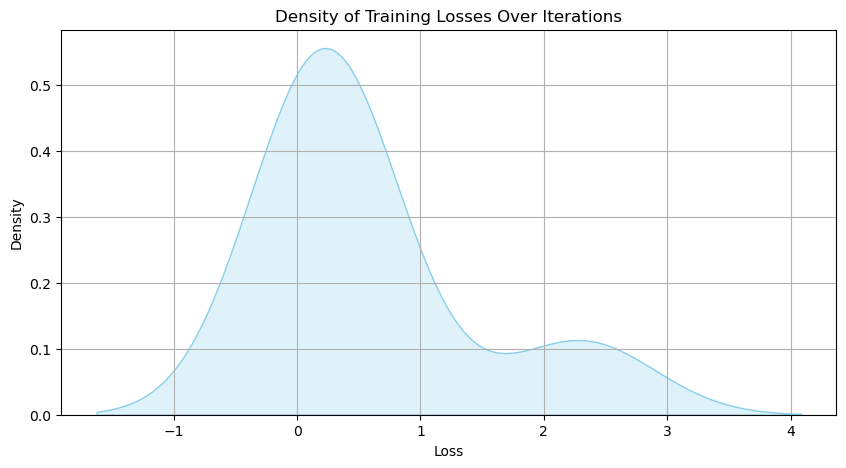

In [15]:
plt.figure(figsize=(10, 5))
sns.kdeplot(model.training_loss, fill=True, color="skyblue")
plt.title("Density of Training Losses Over Iterations")
plt.xlabel("Loss")
plt.ylabel("Density")
plt.grid(True)
plt.show()

*The above graph, desnsity vs loss over iterations shows how drastically the error has gone down over iteratuons*
<br>**This thing has been possible probably bacause :** 
- use of *ReLU* as the activation function in the hidden layer
- use of *categorical cross entropy* as the loss function
- use of *softmax* at the output layer to clearly find the probability of belonging to each class for a data point

## 🔹 Training Accuracy
The training data is fed to the model to make predictions out of it. We aim to see how accurately the model predicts its training data 

In [16]:
y_pred = model.predict(X_train)
accuracy = np.mean(y_pred == y_train)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

Training Accuracy: 95.58%


*The obtained result is in general considered a good one*

## 🔹 Confusion Matrix for training data
The purpose of using a **confusion matrix in digit classification** is to:

 🎯 **Understand Model Performance Class-Wise**

* *Digit classification* involves predicting digits (0–9), which is a *multi-class classification* task.
* The confusion matrix shows *how often each digit is correctly or incorrectly predicted*.

🔍 **Key Insights It Provides:**

* Which digits the model confuses most often (e.g., confusing 4 with 9).
* Whether certain digits are consistently misclassified.
* Whether the model favors or neglects any class due to imbalance.

✅ **Usefulness:**

* Helps in *debugging and improving model accuracy*.
* Reveals if *additional training or preprocessing* is needed for specific digits.
* Useful in reporting performance for practical applications like OCR (optical character recognition).

In short, it gives a *granular view of the classifier’s behavior* beyond just overall accuracy.


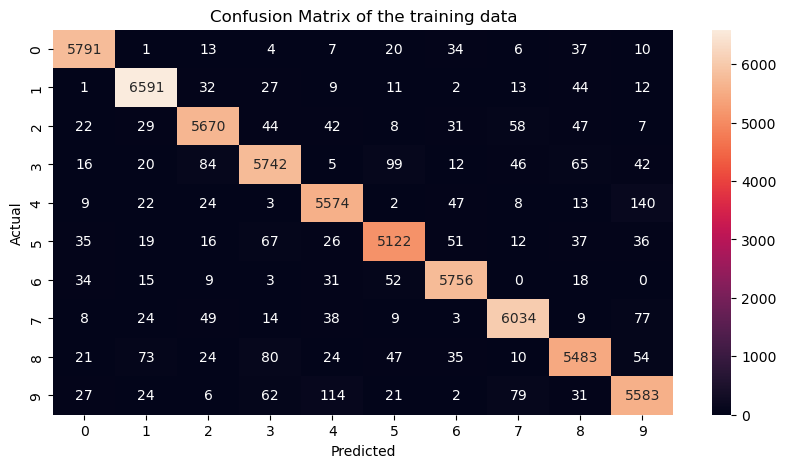

In [17]:
confusionMatrix = tf.math.confusion_matrix(labels = y_train, predictions = y_pred)
plt.figure(figsize = (10, 5))
sns.heatmap(confusionMatrix, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of the training data")
plt.show()

## 🔹 Load the testing data

- *X_test* to *check the model on unseen data*
- *y_test* to *find testing accuracy*

In [19]:
X_test = np.load("C:\\ML and DS\\digit_clasification\\digit_classification_testing_data.npy")
y_test = np.load("C:\\ML and DS\\digit_clasification\\digit_classification_testing_labels.npy")

## 🔹 Testing Accuracy
The *out of sample error*, i.e the error we get while predicting 'unseen' (to the model while training) data, gives a clear oicture about feasibility of th model's training and learning. In this purpose we fed the model out training dataset and see how accuratly it predicts the digits

In [20]:
y_pred_test = model.predict(X_test)
accuracy = np.mean(y_pred_test == y_test)
print(f"Testing Accuracy: {accuracy * 100:.2f}%")

Testing Accuracy: 95.28%


*Our result here is almost same as what we got in the training accuracy. This phenomenon says the model generalized well*

## 🔹 Confusion Matrix for testing data
The purpose of using a *confusion matrix in digit classification for training data* is to:

🎯 **Why Use It?**
- Assess Generalization: Shows how accurately the model classifies digits it hasn’t seen before.

- Validate Model Robustness: Ensures the model doesn’t overfit training data.

- Class-Specific Evaluation: Reveals which digits are still being misclassified on real-world or validation data.

🎯 **Insights You Can Get**
- If certain digits are consistently misclassified both during training and testing → model needs improvement.

- If only test errors are high → your model may be overfitting.

- If confusion is asymmetric (e.g., always confusing 3 as 5 but not vice versa) → potential labeling or feature issues.

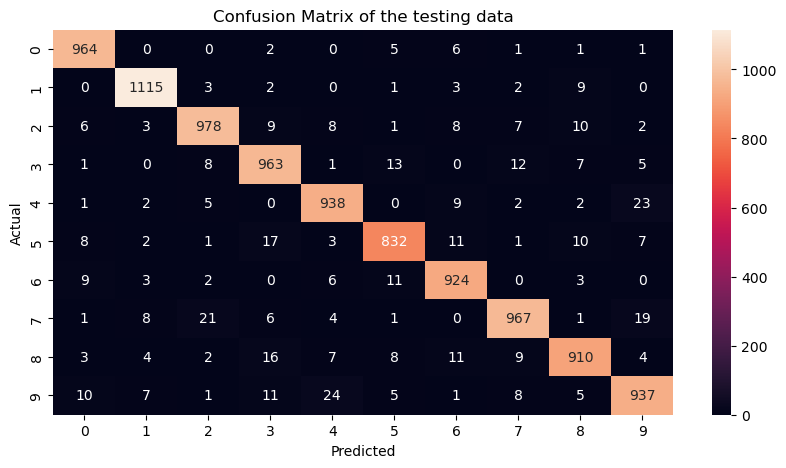

In [21]:
confusionMatrix = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_test)
plt.figure(figsize = (10, 5))
sns.heatmap(confusionMatrix, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of the testing data")
plt.show()

## 🔹 Measuring Overfitting with r2_score


🎯 **Overfitting**
- Overfitting is when a machine learning model learns the training data too well, including its noise and random fluctuations, instead of just the underlying patterns
- *r2 = 0.98 (training)* and *r2 = 0.60 (testing)* signifies *overfitting* of the model


🎯 **Coefficient of Determination(r2_score)**
- The coefficient of determination, denoted as R², is a metric that tells you how well your model explains the variability of the output (target) variable.
- R² = 1 − (SS_res / SS_tot)

Where:

SS_res = Sum of squares of residuals (prediction error)

SS_tot = Total sum of squares (variance of actual data)

- "r2_score" is *imported from Sci-Kit Learn*

In [25]:
from sklearn.metrics import r2_score
score = r2_score(y_train, y_pred)
print(f"r2_score for training: {score:.4f}")

score = r2_score(y_test, y_pred_test)
print(f"\nr2_score for testing: {score:.4f}")


r2_score for training: 0.9014

r2_score for testing: 0.8933


*Since, the values are quite close and not too high for training (like 0.95+), we can infer there is minimal or hardly any overfitting*

## 💾 Saving the Trained Model with Pickle
- Allows you to store the trained model for later use without retraining.

- Useful when training is time-consuming or requires significant computational resources.

- Ensures consistency in results by preserving the exact model state.

- Enables easy sharing or deployment of the model in other scripts or environments.

- The trained model will be loaded into in another notebook for making predictions 


In [22]:
import pickle 
with open("\\ML and DS\\digit_clasification\\myDigitClassifier.pkl", 'wb') as f :
    pickle.dump(model, f)

*The entire model object is saved to a file in binary format*